In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Klastrowanie hierarchiczne

Porównanie rzóżnych podejśc do łączeni grup.

In [2]:
rnd.seed(123)
X = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
y = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)

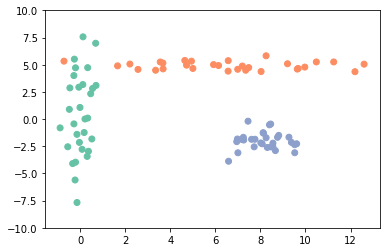

In [3]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.ylim(-10,10)
plt.show()

In [4]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

#  method='ward'

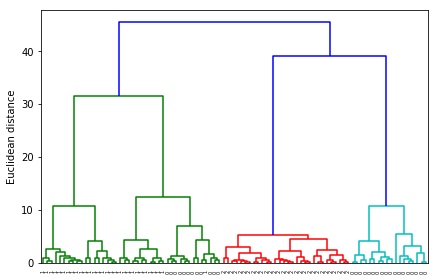

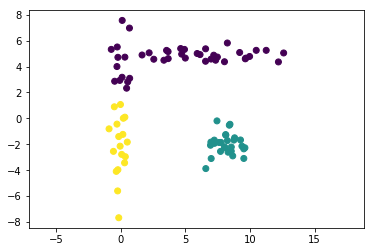

0.6817165847116674


In [5]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="average"

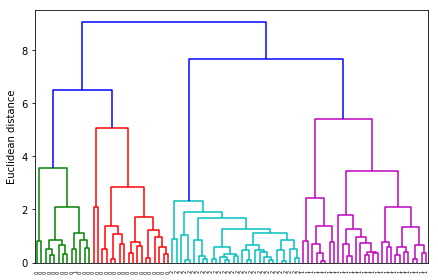

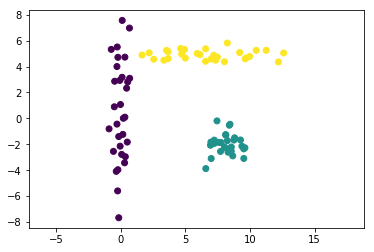

0.9664753465150577


In [6]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="single"

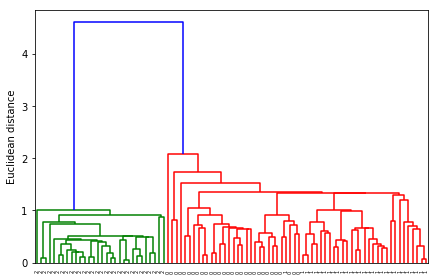

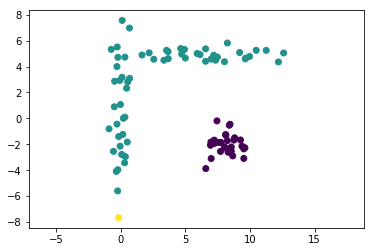

0.5619939672963962


In [7]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 

row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method="complete"

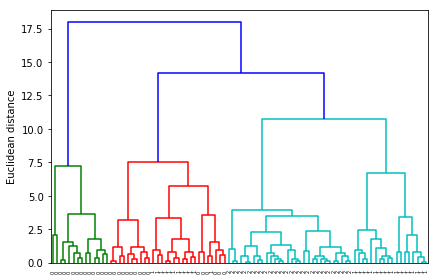

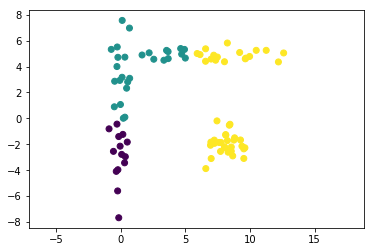

0.37031849902204617


In [8]:
df = pd.DataFrame(X, index=y)
df
   
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') 

row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# method = 'median' 

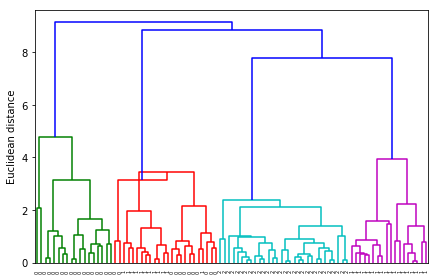

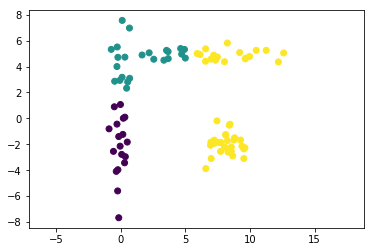

0.39588351215239764


In [9]:
df = pd.DataFrame(X, index=y)
df

row_clusters = linkage(pdist(df, metric='euclidean'), method='median') 

row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad. 

uruchom kod i go przeanalizuj:

http://scikit-learn.org/dev/auto_examples/cluster/plot_linkage_comparison.html

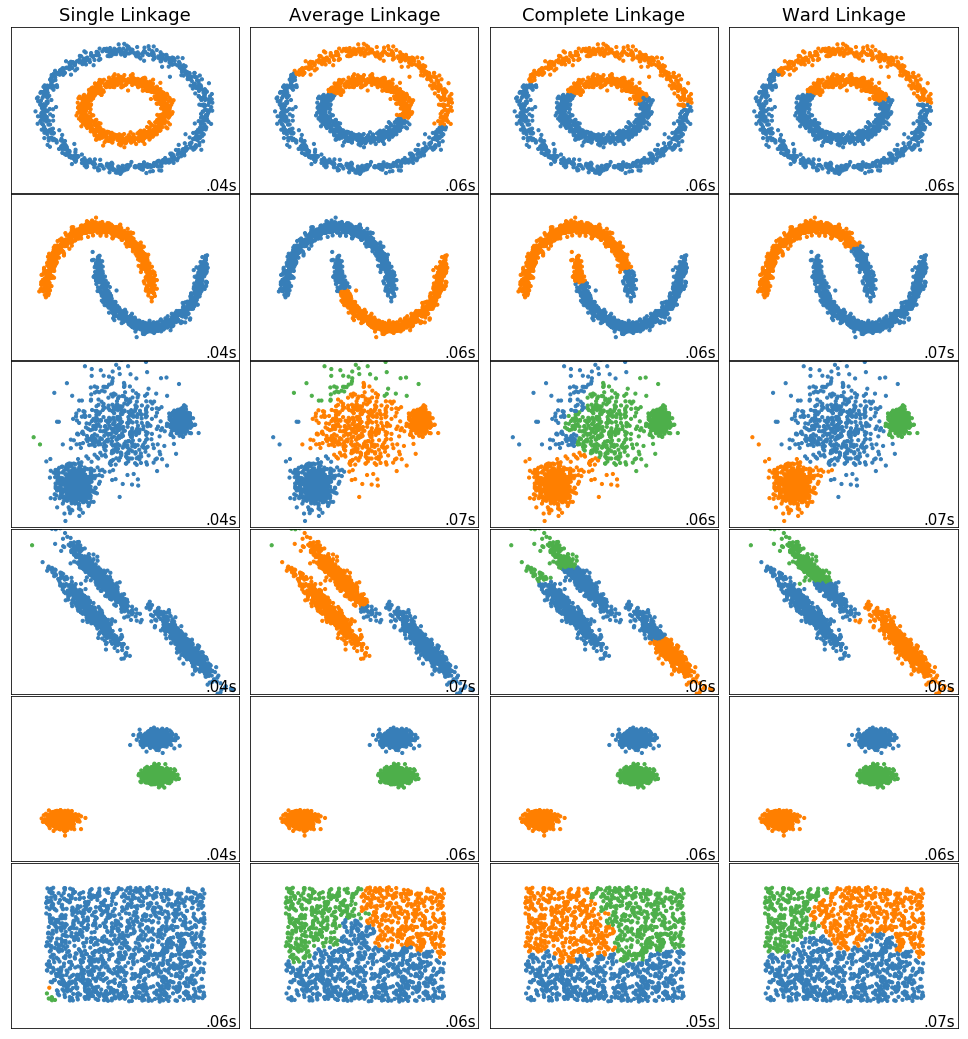

In [10]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# Różne odległości

In [11]:
import scipy.spatial.distance as dis

# euclidean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean

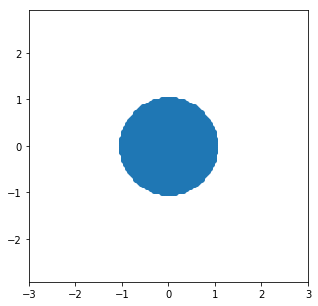

In [12]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.euclidean([0,0],[i,j]) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# cityblock

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cityblock.html#scipy.spatial.distance.cityblock

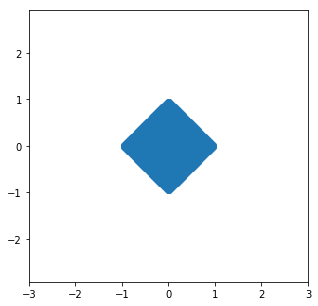

In [13]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.cityblock([0,0],[i,j]) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# minkowski

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html#scipy.spatial.distance.minkowski

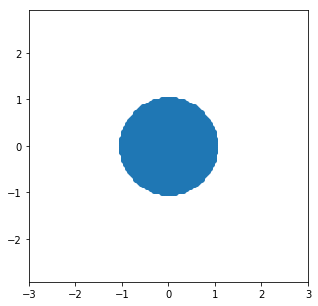

In [14]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.minkowski([0,0],[i,j], p=2 ) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# mahalanobis

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html#scipy.spatial.distance.mahalanobis

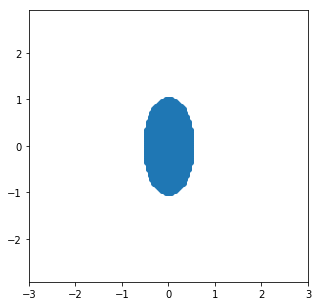

In [15]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], [[4,0],[0,1]] ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

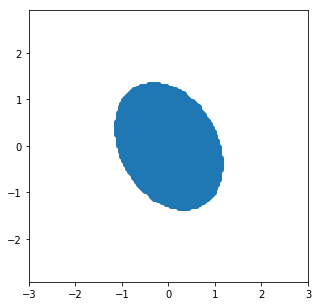

In [16]:
theta = np.pi/3
V = np.linalg.inv(
    np.dot(np.dot(np.transpose([[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]]) , [[2,0],[0,1]]),
           [[np.cos(theta),-np.sin(theta)],[  np.sin(theta),np.cos(theta)]] 
))

# http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.mahalanobis([0,0],[i,j], V ) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()


# cosine

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine

https://en.wikipedia.org/wiki/Cosine_similarity

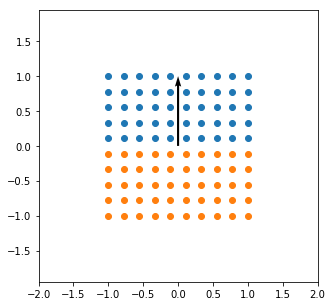

In [17]:
data = []
data1 = []
for i in np.linspace(-1., 1.0, num=10):
    for j in np.linspace(-1., 1.0, num=10):
        if( dis.cosine([0,1],[i,j]) < 1 ):
            data.append( [i,j] )
#         print(dis.cosine([0.1,0.1],[i,j]))
        else:
            data1.append( [i,j] )
#             print(1)
data = np.array(data)   
data1 = np.array(data1)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.scatter(data1[:,0], data1[:,1])
V = np.array([[0,1]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', scale=1)
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

# Zad.

Zgadnij, które parametry działają najlepiej.

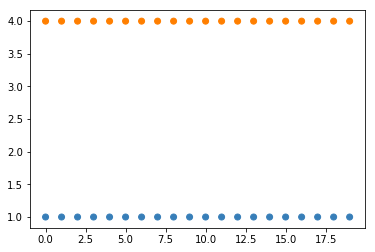

In [18]:
X= np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T
y = np.hstack((np.repeat(0,20),np.repeat(1,20)))
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

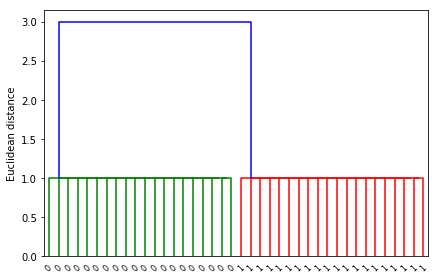

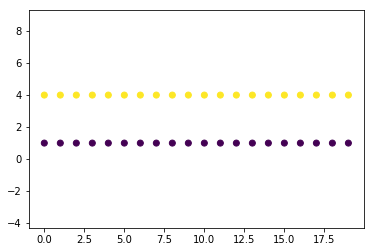

1.0


In [22]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, które parametry działają najlepiej.

In [53]:
X = np.loadtxt("./data_cl/flame_data.txt")
y = np.loadtxt("./data_cl/flame_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(240, 2)
[0 1]


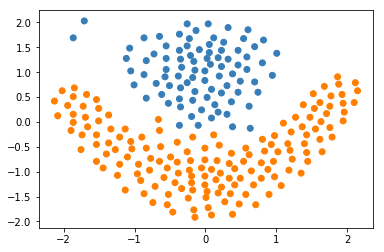

In [24]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

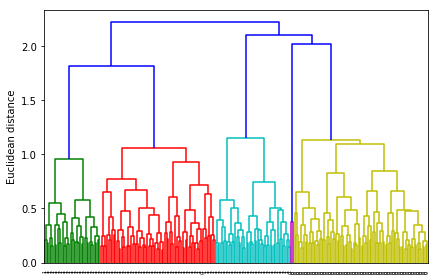

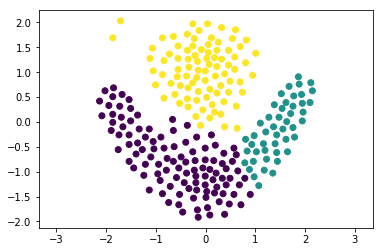

0.6461549988848148


In [27]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

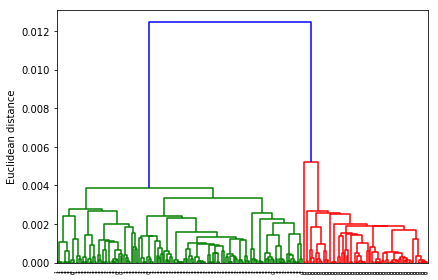

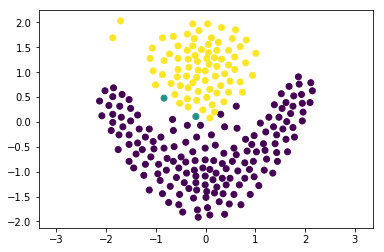

0.8903590371626322


In [54]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='cosine'), method='single') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, które parametry działają najlepiej.

In [56]:
X = np.loadtxt("./data_cl/pathbased_data.txt")
y = np.loadtxt("./data_cl/pathbased_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(300, 2)
[0 1 2]


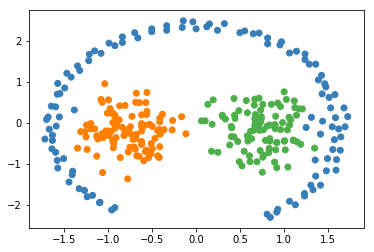

In [33]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

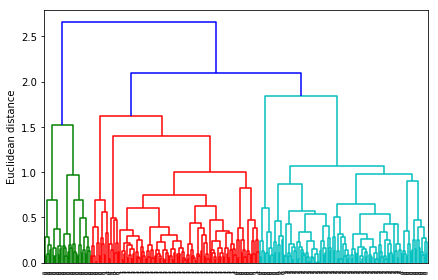

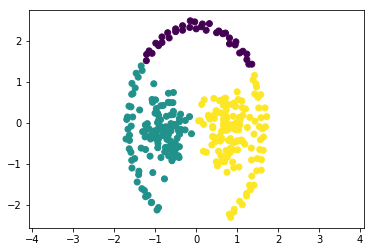

0.4717440461007611


In [34]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

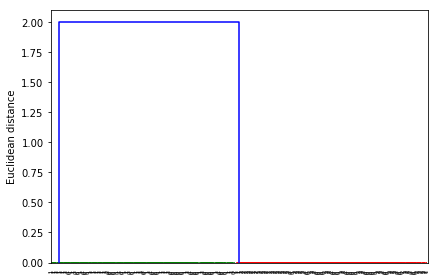

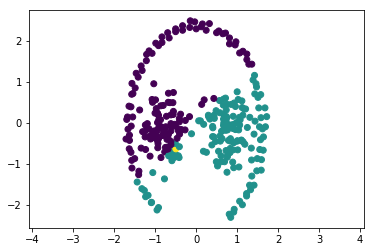

0.27264199913201587


In [67]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='correlation'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [40]:
X = np.loadtxt("./data_cl/jain_data.txt")
y = np.loadtxt("./data_cl/jain_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(373, 2)
[0 1]


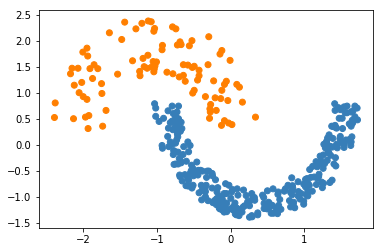

In [41]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

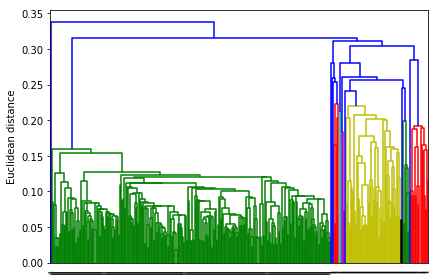

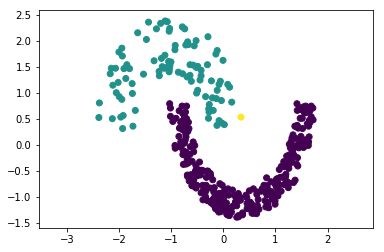

0.9970824241666518


In [43]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, które parametry działają najlepiej.

In [68]:
X = np.loadtxt("./data_cl/Compound_data.txt")
y = np.loadtxt("./data_cl/Compound_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(399, 2)
[0 1 2 3 4 5]


In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

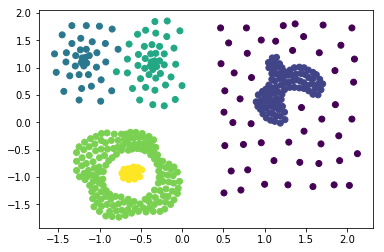

In [73]:
# plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
# plt.show()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

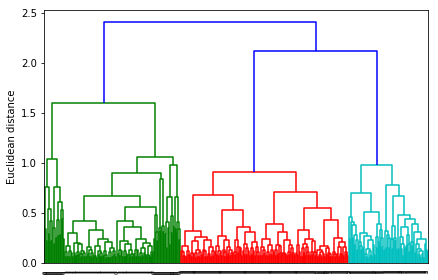

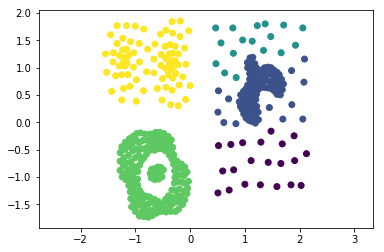

0.8066947846552014


In [78]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='average') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 5, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))

# Zad.

Zgadnij, które parametry działają najlepiej.

In [49]:
X = np.loadtxt("./data_cl/spiral_data.txt")
y = np.loadtxt("./data_cl/spiral_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(312, 2)
[0 1 2]


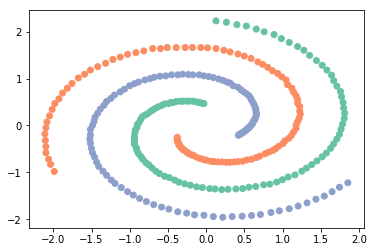

In [13]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

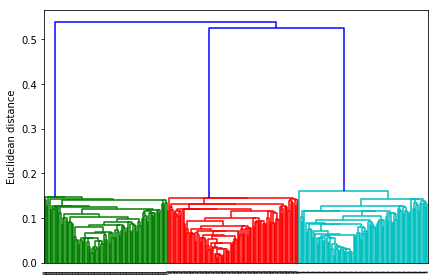

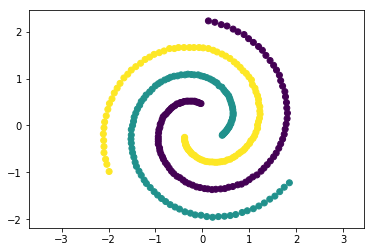

1.0


In [51]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='single') 



row_dendr = dendrogram(row_clusters, 
                       labels=y)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.axis("equal")
plt.show()

print(metrics.adjusted_rand_score(y, part))